# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="app/Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

### Create the agent

Most of the model and ddpg agent code are located in the associated python files `model.py` && `ddpg_agent.py`

`model.py` contains two models `Actor` && `Critic`

`ddpg_agent.py` contains the agent(s) used in the below example. `Agent` && `MultiAgent`

`Agent` is a fairly standard DDPG agent, where `MultiAgent` uses certain features of the DDPG agent but introduces different a learning strategy based on whether the Critic will be updated across the board or per Agent.

In [12]:
from ddqn_agent import Agent
agent = Agent(state_size=24, action_size=2, random_seed=2, num_agents=2)

BUFFER_SIZE: 100000
BATCH_SIZE: 128
GAMMA: 0.99
TAU: 0.001
LR_ACTOR: 0.0001
LR_CRITIC: 0.0003
WEIGHT_DECAY: 0
UPDATE_EVERY: 1
UPDATE_TIMES: 1


### Run the environment

The following cell runs the environment in a fairly standard way as well. For each episode it runs for a maximum of `max_t` timesteps. Within each timestep we:

- use the agent to act on the vector observations
- pass those to the environment and collect the new environment info
- assign new vars for next_states, rewards and if there are any done agents
- add to the score
- step the agent with the new & old states, rewards and done list
- move the new states to the state object for next actions and repeat

Episode 50	Average Score: 0.00	Average Time Per Episode: 0:00:00.428161	Time to Complete: 00:35:19
Episode 100	Average Score: 0.00	Average Time Per Episode: 0:00:00.420742	Time to Complete: 00:34:21
Episode 150	Average Score: 0.00	Average Time Per Episode: 0:00:00.423506	Time to Complete: 00:34:14
Episode 200	Average Score: 0.00	Average Time Per Episode: 0:00:00.439603	Time to Complete: 00:35:10
Episode 250	Average Score: 0.00	Average Time Per Episode: 0:00:00.442601	Time to Complete: 00:35:02
Episode 300	Average Score: 0.00	Average Time Per Episode: 0:00:00.443892	Time to Complete: 00:34:46
Episode 350	Average Score: 0.00	Average Time Per Episode: 0:00:00.448061	Time to Complete: 00:34:43
Episode 400	Average Score: 0.00	Average Time Per Episode: 0:00:00.448277	Time to Complete: 00:34:22
Episode 450	Average Score: 0.00	Average Time Per Episode: 0:00:00.448657	Time to Complete: 00:34:01
Episode 500	Average Score: 0.00	Average Time Per Episode: 0:00:00.449011	Time to Complete: 00:33:40
E

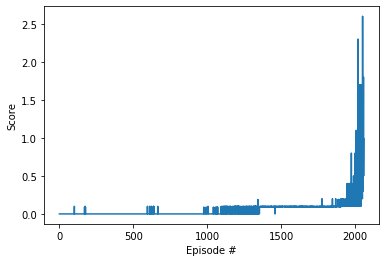

In [14]:
import torch
import datetime
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

def ddpg(n_episodes=5000, max_t=1200, max_score_over=100, print_every=50):
    scores_deque = deque(maxlen=max_score_over)
    scores = []
    times = []
    for i_episode in range(1, n_episodes+1):
        scores_a = .0
        scores_b = .0
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        time_a = datetime.datetime.now()
        agent.reset()
        for t in range(max_t):
            actions = agent.act(states)

            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            scores_a += env_info.rewards[0]
            scores_b += env_info.rewards[1]
            
            # print('\rEpisode {}\tScore: {}\tTimestep: {}\tAction: {}\t\t'.format(i_episode, scores.mean(), t, actions[0]), end="")
            
            # need to step for each state
            # for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
            #     agent.step(state, action, reward, next_state, done)
            agent.step(states, actions, rewards, next_states, dones)
            
            states = next_states
            
            if np.any(dones):
                break
                
        time_b = datetime.datetime.now()
        time = time_b - time_a
        times.append(time_b - time_a)
        time_average = np.mean(times)
        time_remaining = (n_episodes*time_average.total_seconds()-i_episode*time_average.total_seconds())/60/60
        
        scores.append(max(scores_a, scores_b))
        scores_deque.append(max(scores_a, scores_b))

        hours = int(time_remaining)
        minutes = int((time_remaining*60) % 60)
        seconds = int((time_remaining*3600) % 60)

        # scores.append(score)
        # print('Episode {}\tAverage Score: {:.2f}\tAverage Time Per Episode: {}\tTime to Complete: {:02d}:{:02d}:{:02d}'.format(
        #     i_episode,
        #     np.mean(scores_deque),
        #     time_average,
        #     hours,
        #     minutes,
        #     seconds
        # ), end="\n")
        agent.save('checkpoint_actor_ddqn', 'checkpoint_critic_ddqn')
        # torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        # torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            # print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            print('Episode {}\tAverage Score: {:.2f}\tAverage Time Per Episode: {}\tTime to Complete: {:02d}:{:02d}:{:02d}'.format(
                i_episode,
                np.mean(scores_deque),
                time_average,
                hours,
                minutes,
                seconds
            ), end="\n")
        if np.mean(scores_deque) > 0.5:
            print('\nSolved! Episode: {}, Solved after {} episodes! Average score over last 100 episodes: {}'.format(
                i_episode, i_episode - 100, np.mean(scores_deque)
            ))
            break
            
    return scores

scores = ddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [13]:
import torch

agent.load('checkpoint_actor_ddqn')
# agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth', map_location='cpu'))

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break

print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 2.3950000358745456


In [14]:
env.close()